# Analysis of the London Rental Property Market
Analysis of the London rental property market based on all rental listings added to <a href="http://www.rightmove.co.uk" _target="blank">rightmove</a> in the last 24 hours.

In [1]:
# Setup:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
from rightmove_webscraper import RightmoveData

# Additional imports for analysis:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# URL for all London properties to rent, added in last 24hrs:
url = "http://www.rightmove.co.uk/property-to-rent/find.html?searchType=RENT&\
locationIdentifier=REGION%5E87490&insId=1&radius=0.0&minPrice=&maxPrice=&\
minBedrooms=&maxBedrooms=&displayPropertyType=&maxDaysSinceAdded=1&\
sortByPriceDescending=&_includeLetAgreed=on&primaryDisplayPropertyType=&\
secondaryDisplayPropertyType=&oldDisplayPropertyType=&\
oldPrimaryDisplayPropertyType=&letType=&letFurnishType=&houseFlatShare="

# Scrape rightmove:
rmd = RightmoveData(url)

### How many listings are there for each type of apartment?
E.g. Studios, 1-beds, 2-beds etc.

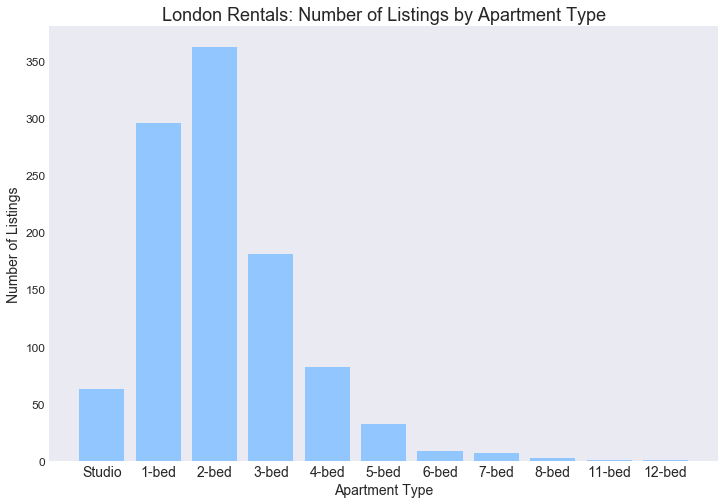

In [8]:
def plot_by_type(rmd: RightmoveData):
    """Bar chart of count of results by number of bedrooms."""
    df = rmd.summary()
    labels = [f"{i}-bed" if i != 0 else "Studio" for i in df["number_bedrooms"]]
    x = df.index
    y = df["count"]
    sns.set_style("dark")
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.title("London Rentals: Number of Listings by Apartment Type", size = 18)
    plt.xlabel("Apartment Type", size = 14)
    plt.ylabel("Number of Listings", size = 14)
    plt.xticks(size = 14)
    plt.yticks(size = 12)
    plt.bar(x, y, tick_label=labels)
    plt.show()

plot_by_type(rmd)

## Which postcode areas have the most listings?

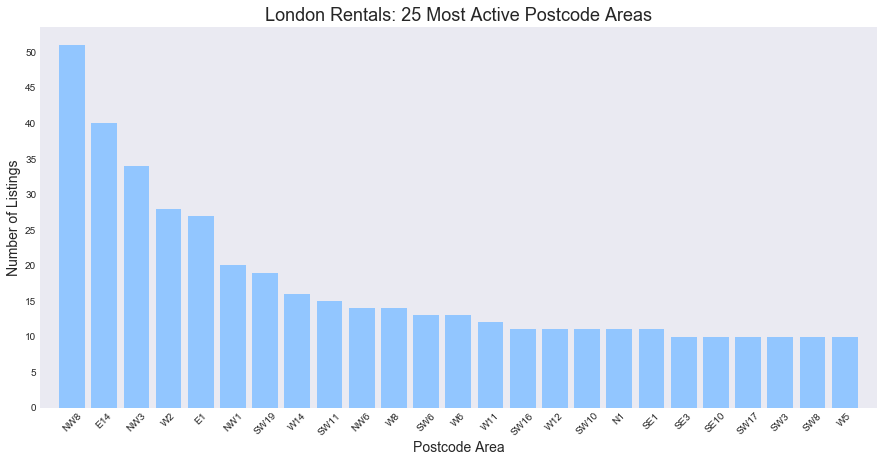

In [45]:
def plot_by_postcode(rmd: RightmoveData, number_to_plot: int = 25):
    """Plot count of results by postcode."""
    df = rmd.summary("postcode")
    df.sort_values(by="count", ascending=False, inplace=True)
    df = df.reset_index(drop=True)[:number_to_plot]
    x, y = df["postcode"], df["count"]
    ymax = ((df["count"].max() // 5) + 1) * 5
    sns.set_palette(sns.color_palette("pastel"))
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.bar(x.index, height=y)
    ax.set_title(f"London Rentals: {number_to_plot} Most Active Postcode Areas", size=18)
    ax.set_xlabel("Postcode Area", size=14)
    ax.set_ylabel("Number of Listings", size=14)
    ax.set_xticks(x.index)
    ax.set_xlim(-1, x.index[-1]+1)
    ax.set_xticklabels(x.values, rotation=45)
    ax.set_yticks(range(0, ymax, 5))
    return fig

f = plot_by_postcode(rmd, number_to_plot=25)

In [77]:
rmd.get_results

,price,type,address,url,agent_url,postcode,number_bedrooms,search_date
1,1950,1 bedroom apartment,"Perseus Court, Blackwall Reach, Blackwall, E14",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,E14,1.0,2019-10-07 21:28:47.181821
6,1733,2 bedroom flat,"Goldhurst Terrace, South Hampstead, London, NW...",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,NW6,2.0,2019-10-07 21:28:47.181821
8,2301,3 bedroom semi-detached house,"HIGH ROAD, WHETSTONE, N20 9PP",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,N20,3.0,2019-10-07 21:28:47.181821
9,2200,4 bedroom terraced house,Duckett Street Stepney E1,http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,E1,4.0,2019-10-07 21:28:47.181821
10,26000,4 bedroom terraced house,"South Audley Street, Mayfair, London, W1K",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W1K,4.0,2019-10-07 21:28:47.181821
...,...,...,...,...,...,...,...,...
1045,1175,1 bedroom flat share,"Queensway, London, W2",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W2,1.0,2019-10-07 21:28:47.181821
1046,2578,2 bedroom flat,"Hungerford House, 22 Napier Place, London, W14",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W14,2.0,2019-10-07 21:28:47.181821
1047,2492,2 bedroom terraced house,"Colville Road, Notting Hill, London, W11",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W11,2.0,2019-10-07 21:28:47.181821
1048,1200,1 bedroom flat share,"Gloucester Place, London, W1U",http://www.rightmove.co.uk/property-to-rent/pr...,http://www.rightmove.co.uk/estate-agents/agent...,W1U,1.0,2019-10-07 21:28:47.181821


## What are the average prices and number of listings in each London borough?

In [102]:
def get_districts():
    """Load the postcode-district CSV (downloaded from:
    https://www.doogal.co.uk/PostcodeDownloads.php)"""
    df = pd.read_csv("postcode-district.csv", encoding="utf-8")
    return df


def get_inner_outer():
    """Get the inner/outer London classification from CSV."""
    iol = pd.read_csv("./inner_outer_london.csv", header=None)
    iol.rename(columns={0: "borough", 1: "inner_outer"}, inplace=True)
    return iol


def make_dataset(rmd: RightmoveData):
    """Make the dataset for visualization."""
    df = rmd.get_results
    df.dropna(subset=["postcode"], inplace=True)
    
    # Merge in the postcode district (borough):
    postcodes = get_districts()
    
    # Only need the stem of the postcode (e.g. from "N1 6RQ": "N1"):
    postcodes["stem"] = postcodes["Postcode"].str.split(" ").str.get(0)
    postcodes.drop_duplicates(inplace=True)  # Drop duplicate rows.
    
    # Some postcodes cross multiple districts, e.g. N1 is in Hackney 
    # and Islington. To deal with this take a pivot of postcode
    # and District, and keep the District with the highest count.
    postcodes["district_count"] = postcodes.groupby(["stem", "District"])["Postcode"].transform("count")
    postcodes.sort_values(by=["district_count"], ascending=False, inplace=True)
    postcodes.drop_duplicates(subset=["stem"], keep="first", inplace=True)
    df = pd.merge(df, postcodes[["stem", "District"]], how="inner", left_on="postcode", right_on="stem")
    
    # Merge in the Inner/Outer London classification:
    iol = get_inner_outer()
    df = pd.merge(left=df, right=iol, how="inner", left_on="District", right_on="borough")
    
    piv = pd.pivot_table(df, index="borough", values="price", aggfunc=("count", "mean"))
    io = dict(zip(df["borough"], df["inner_outer"]))
    piv["io"] = piv.index.map(io)
    return piv.reset_index()


def good_axis_max(axis_max):
    """Helper function to get nice axis limit for charts."""
    magnitude = 10**(len(str(axis_max))-1)
    max_axis = ((axis_max // magnitude) + 1) * magnitude
    return max_axis


def good_axis_min(axis_min):
    """Helper function to get nice axis limit for charts."""
    magnitude = 10**(len(str(axis_min))-1)
    min_axis = (((axis_min) // magnitude)) * magnitude
    if axis_min == min_axis and axis_min > 0:
        min_axis -= magnitude
    return min_axis


def borough_scatterplot(df, x, y, title, size=7, aspect=1.2):
    """Create a scatter plot of price & number of listings by borough."""
    
    df.sort_values(by = ["mean", "count"])
    df.reset_index(inplace = True, drop = True)
    
    sns.set_style("white")
    scatter = sns.lmplot(x=x, y=y, data=df, fit_reg = False, hue="io",
                         palette = sns.color_palette("bright"),
                         legend=False, size = size, aspect = aspect)
#     scatter.set(xlim = (good_axis_min(df[x].min()), good_axis_max(df[x].max()) + 0.1), 
#                         ylim = (good_axis_min(df[y].min()), good_axis_max(df[y].max())))
        
    # Add data labels:
    labels = df.index
    style = dict(size=10, color='gray')
    for r in range(len(df)):
        x = df.loc[r, "count"]
        y = df.loc[r, "mean"]
        label = df.loc[r, "borough"]
        scatter.ax.text(x, y, label, **style)

    plt.title(title, size=14)
    plt.legend(loc = "upper right", bbox_to_anchor=(1.2, 1), fontsize = "xx-large", )
    plt.xlabel("Property Count", size=14)
    plt.ylabel("Average Price", size=14)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.show()
    
    
df = make_dataset(rmd)
df.tail()

,borough,count,mean,io
21,Southwark,29.0,2188.034483,Inner
22,Tower Hamlets,85.0,2101.129412,Inner
23,Waltham Forest,15.0,1376.000000,Outer
24,Wandsworth,36.0,2270.888889,Inner
25,Westminster,146.0,5904.294521,Inner


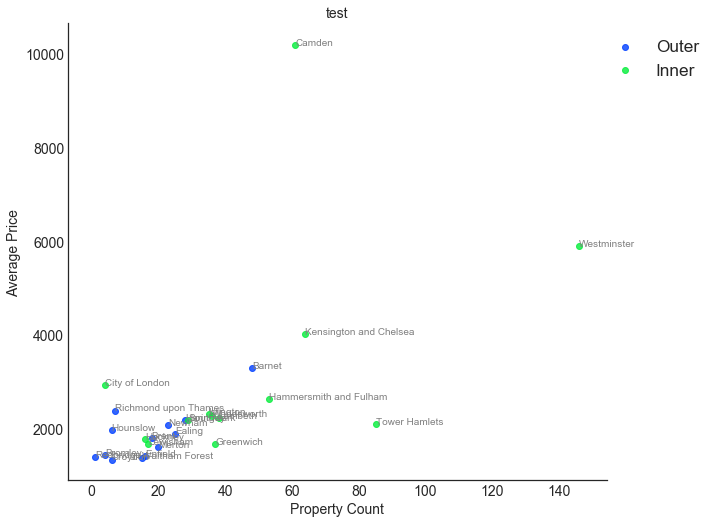

In [103]:
borough_scatterplot(df, "count", "mean", "test")

First off for all types of apartment:

In [47]:
# File to use to add in borough data:
postcodes_df = pd.read_csv("./postcodes.csv", low_memory = False)

price_by_borough_df = summary_df(remove_null_rows(add_inner_outer(add_borough(df, postcodes_df)), "borough"), col_to_group = "borough", col_to_summarise = "price")

borough_scatterplot(price_by_borough_df, "count", "mean", "borough",
                    "London Rentals: Average Price by Number of Listings",
                    "Number of Listings", "Average Price", "inner_outer")

FileNotFoundError: [Errno 2] File b'./postcodes.csv' does not exist: b'./postcodes.csv'

Next just for one-beds:

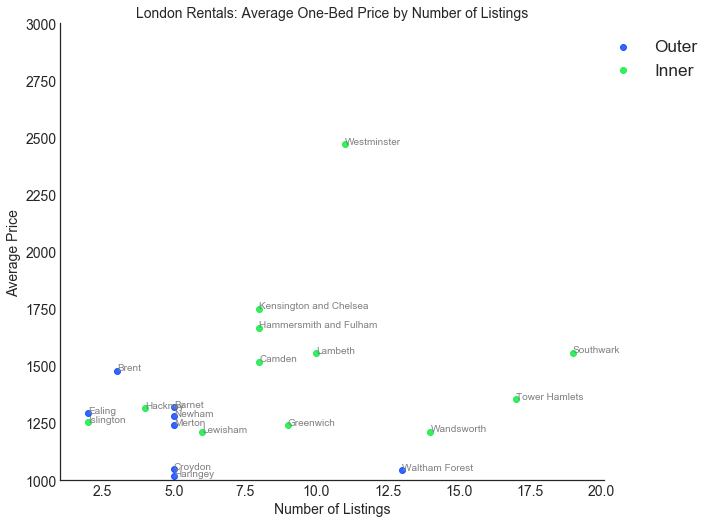

In [12]:
one_beds = df[df["number_bedrooms"]=="1"]
one_beds_borough_df = summary_df(remove_null_rows(add_inner_outer(add_borough(one_beds, postcodes_df)), "borough"),
                                 col_to_group = "borough", col_to_summarise = "price")

borough_scatterplot(one_beds_borough_df, "count", "mean", "borough",
                    "London Rentals: Average One-Bed Price by Number of Listings",
                    "Number of Listings", "Average Price", "inner_outer")

Wandsworth and Tower Hamlets look like cheaper inner-London boroughs with plentiful listings ...
## Find some promising listings

In [13]:
def cheap_listings(rightmove_data, postcodes_df, boroughs = [], number=10):
    df = rightmove_data.get_results
    df = add_borough(df, postcodes_df)
    df = df[df["borough"].isin(boroughs)]
    df.sort_values(by = "price", ascending = True, inplace = True)
    df.reset_index(inplace = True, drop = True)
    for l in range(number):
        print("£{} - {} - {}" .format(df.loc[l, "price"], df.loc[l, "borough"], df.loc[l, "url"]))
        
cheap_listings(rightmove_data, postcodes_df, boroughs = ["Wandsworth", "Tower Hamlets"], number = 10)

£650 - Tower Hamlets - http://www.rightmove.co.uk/property-to-rent/property-64439227.html
£672 - Tower Hamlets - http://www.rightmove.co.uk/property-to-rent/property-71912681.html
£700 - Wandsworth - http://www.rightmove.co.uk/property-to-rent/property-71911172.html
£700 - Wandsworth - http://www.rightmove.co.uk/property-to-rent/property-71911220.html
£700 - Wandsworth - http://www.rightmove.co.uk/property-to-rent/property-71911277.html
£725 - Tower Hamlets - http://www.rightmove.co.uk/property-to-rent/property-51724320.html
£725 - Tower Hamlets - http://www.rightmove.co.uk/property-to-rent/property-51724320.html
£750 - Tower Hamlets - http://www.rightmove.co.uk/property-to-rent/property-64439221.html
£750 - Tower Hamlets - http://www.rightmove.co.uk/property-to-rent/property-64439224.html
£750 - Wandsworth - http://www.rightmove.co.uk/property-to-rent/property-71911103.html
